# Análise de Qualidade dos Dados
## Conteúdo
1. ***[Introducao](#introduction)***
2. ***[Inspeção Visual](#visual-inspection)***
3. ***[Identificação de Variáveis Quantitativas e Qualitativas](#ident-quant-qual)***
    1. ***[Variáveis Qualitativas](#qual-var)***
    2. ***[Variáveis Quantitativas](#quant-var)***
4. ***[Resultados](#results)***

In [19]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import sys, os
sys.path.insert(0,os.path.realpath('..'))
pd.options.display.max_columns = 50

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Introdução <a name="introduction"></a>

Nesse notebook, nós teremos nosso primeiro contato com os dados. Ao final da presente análise, nós queremos ter um overview geral dos dados, ter identificado problemas de qualidade e organização das variáveis e ter proposto soluções que nos permitam obter uma dataset de melhor qualidade. Note que esse notebook é uma compilação de problemas e soluções encontradas: 1) na análise atual; 2) durante a etapa futura de modelagem dos problemas;

Nós não realizamos a análise do conjunto de testes propositalmente. Espera-se que a distribuição dos dados do conjunto de testes (e de futuros dados reais) siga a distribuição do conjunto de treinamento e, por isso, esperamos que as transformações dos dados de treinamento sejam úteis e válidas no conjunto de testes. Note que a não inclusão da análise do conjunto de testes visa evitar o vazamento de dados (data leakage), que consiste na indevida inclusão de informações do conjunto de teste na etapa de treinamento.
    
**Na análise a seguir, nós queremos:**
1. **Inspecionar os dados e suas variáveis**
2. **Identificar variáveis quantitativas e qualitativas**
3. **Identificar valores nulos (missing values)**
4. **Identificar as variáveis que necessitam de pré-processamento antes de sua utilização**
5. **Finalizar implementando uma função para carregamento e limpeza dos dados**

# Inspeção Visual <a name="visual-inspection"></a>
Essa seção visa prover uma amostra visual das colunas de dados. Esse é nosso pimeiro contato com as variáveis mas poderemos voltar nesse ponto sempre que houver dúvidas em relação às variáveis nas futuras etapas de modelagem.

In [20]:
raw_acquisition_train = pd.read_csv('../data/data/acquisition_train.csv')
raw_spend_train = pd.read_csv('../data/data/spend_train.csv')
display(raw_acquisition_train.head())

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [21]:
display(raw_spend_train.head())

,ids,credit_line,month,spends,revolving_balance,card_request,minutes_cs
0,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,0,6305.06,35.56,1,0.00
1,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,1,4199.99,3406.59,0,0.00
2,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,2,7167.94,0.00,0,0.00
3,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,3,16631.05,0.00,1,5.55
4,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,4,115.29,0.00,0,6.89


# Identificação de Variáveis Quantitativas e Qualitativas <a name="ident-quant-qual"></a>
Nesta seção, o objetivo é identificar o conjunto de variáveis quantitativas e o conjunto de variáveis qualitativas (categóricas). Nós começamos por identificar o dtype de cada variável e, juntamente com a observação das colunas na etapa anterios, podemos obter uma primeira divisão dos dados. Observe que potenciais erros serão corrigidos em etapas futuras.

In [22]:
display(raw_acquisition_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
ids                                                 45000 non-null object
target_default                                      41741 non-null object
score_1                                             44438 non-null object
score_2                                             44438 non-null object
score_3                                             44438 non-null float64
score_4                                             45000 non-null float64
score_5                                             45000 non-null float64
score_6                                             45000 non-null float64
risk_rate                                           44438 non-null float64
last_amount_borrowed                                15044 non-null float64
last_borrowed_in_months                             15044 non-null float64
credit_limit                                        31200 non-null flo

None

Com os dtypes e a inspeção visual, obtemos os seguintes conjuntos de variáveis:

In [23]:
qual_vars = ['ids', 'target_default', 'score_1', 'score_2', 'reason', 'facebook_profile', 'state', 'zip', 'channel', 
             'job_name', 'real_state', 'email', 'external_data_provider_first_name', 
             'marketing_channel', 'profile_phone_number', 'shipping_state', 'profile_tags', 'user_agent',
               'target_fraud','shipping_zip_code']

quant_vars = ['score_3', 'score_4', 'score_5', 'score_6', 'risk_rate','last_amount_borrowed', 'last_borrowed_in_months', 
              'credit_limit','income', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans','n_accounts', 'n_issues', 
              'application_time_in_funnel', 'external_data_provider_credit_checks_last_2_year',
              'external_data_provider_credit_checks_last_month','external_data_provider_credit_checks_last_year',
              'external_data_provider_email_seen_before', 'external_data_provider_fraud_score', 'reported_income','application_time_applied',
              'lat_lon']

### Algumas observações
-  **shipping_zip_code**: Tem tipo numérico mas interpretação categórica
-  **application_time_applied**: Precisa ser convertido para tipo numérico (contagem de minutos à partir de determinado horário)
-  **lat_lon**: Precisa ser pré-processado como tupla e dividido em duas variáveis
-  **profile_tags**: É um dicionário de lista de strings

In [24]:
import src.data_util as du
import src.pipeline_transformers as pp
acquisition_train, spend_train, _ = du.load_data('../data')

### Variáveis Qualitativas <a name="qual-var"></a>
Para futuras estratégias de limpeza de dados e para modelagem em geral, é importanta observar os valores ausentes e o número de valores únicos nas variáveis categóricas. A tabela a seguinr apresenta ambas informações:


In [25]:
categories = acquisition_train[qual_vars]
cat_missing = categories.nunique().to_frame(name="Train Unique Values")
cat_missing['Train Missing Values (%)'] = acquisition_train[qual_vars].isnull().sum()/acquisition_train.shape[0]
display(cat_missing)

,Train Unique Values,Train Missing Values (%)
ids,45000,0.000000
target_default,2,0.072422
score_1,7,0.012489
score_2,35,0.012489
reason,14874,0.012578
facebook_profile,2,0.099067
state,50,0.012489
zip,823,0.012489
channel,1,0.012489
job_name,32265,0.074133


### Usando um heatmap como um missing-map nos permite visualizar uma espécie de 'distribuição conjunta' dos valores ausentes

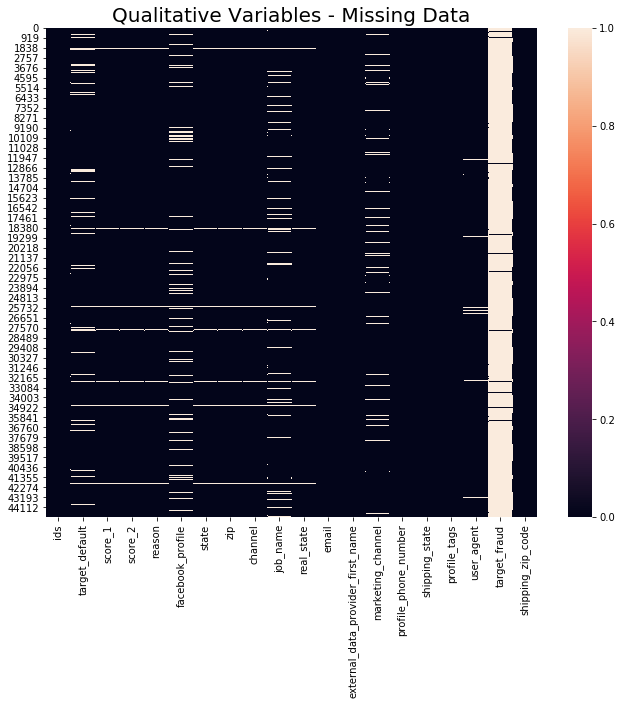

In [26]:
fig = plt.figure(figsize=(11,9))
ax = fig.add_subplot(111)
sns.heatmap(categories.isnull(), ax=ax)
_=ax.set_title('Qualitative Variables - Missing Data', {'fontsize':20})

No missing-map acima, nós temos a informação visual da coluna **Train Missing Values (%)** vista anteriormente mas aqui, é possível observar quando os valores ausentes ocorrem na mesma linha.

### Variáveis Quantitativas <a name="quant-var"></a>
Começamos analisando os valores ausentes

In [27]:
numerics = acquisition_train[du.QUANTITATIVE_RAW_VARS]
num_missing = numerics.isnull().sum().to_frame(name="Missing Values (%)")/numerics.shape[0]
display(num_missing)

,Missing Values (%)
score_3,0.012489
score_4,0.000000
score_5,0.000000
score_6,0.000000
risk_rate,0.012489
last_amount_borrowed,0.665689
last_borrowed_in_months,0.665689
credit_limit,0.306667
income,0.012489
ok_since,0.589889


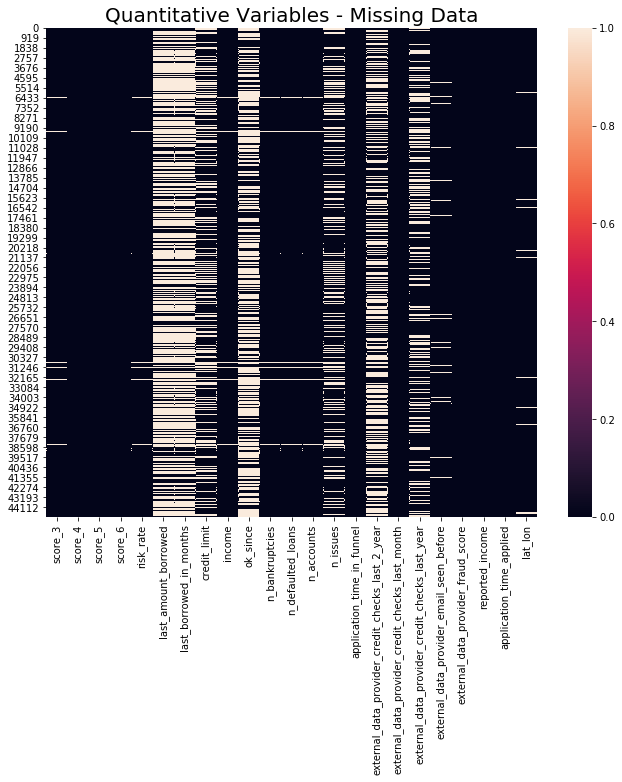

In [28]:
fig = plt.figure(figsize=(11,9))
ax = fig.add_subplot(111)
sns.heatmap(acquisition_train[du.QUANTITATIVE_RAW_VARS].isnull(), ax=ax)
_=ax.set_title('Quantitative Variables - Missing Data', {'fontsize':20})

## Algumas Observações
Observamos variáveis com mais da metade de seus valores ausentes:
- **last_amount_borrowed**
- **last_borrowed_in_months**
- **ok_since**
- **external_data_provider_credit_checks_last_2_year**

Será importante utilizar essas variáveis com cuidado

A seguir, proseguimos com a análise de algumas estatísticas das variáveis quantitativas

In [29]:
display(acquisition_train[du.QUANTITATIVE_RAW_VARS].describe())

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,4.500000e+04
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,4.030000e+02
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,5.094825e+04
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,1.017790e+05
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,1.513372e+05
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf


A principal observação é a presença do valor inf na variável **reported_income**

### Distribuição Log-Normal
Variáveis com interpretação monetária (preço, renda, etc) normalmente apresentam distribuição log-normal. Nós utilizaremos essas variáveis após a aplicação do log para que, assim, sua distribuição se aproxime um pouco mais da normal. Enquanto essa transformação é indiferente para alguns modelos, como aqueles baseados em árvore de decisão, ela pode alterar a performance de modelos baseados em norma, como SVM e regressões regularizadas (Ridge-regression, LASSO, etc)

Nos gráficos abaixo, nós vemos como a log-transformação torna a distribuição da variável `income` mais comportada.


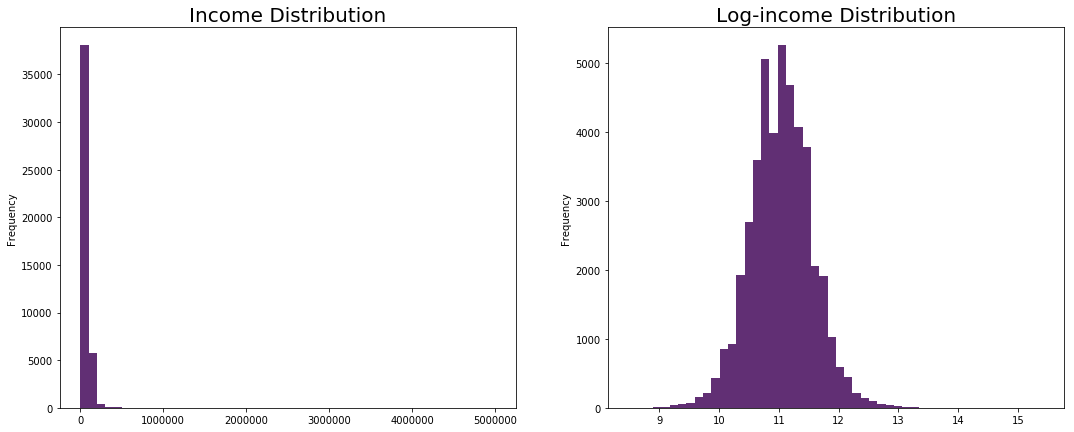

In [30]:
main_color = (97/255, 47/255, 116/255, 1.)
fig = plt.figure(figsize=(18,7))
ax = fig.add_subplot(121)
acquisition_train['income'].plot(kind='hist', bins=50, ax=ax, color=main_color)
ax.set_title('Income Distribution', fontsize=20)
ax = fig.add_subplot(122)
np.log1p(raw_acquisition_train['income']).plot(kind='hist', bins=50, ax=ax, color=main_color)
_=ax.set_title('Log-income Distribution', fontsize=20)

# Resultados <a name="results"></a>
Nessa seção nós apresentamos os problemas e soluções encontrados na presente análise ou que foram coloetadas nas etapas de modelagem:

1. **Valores Ausentes (NaN)**
    - Nós abordaremos o problema de valores ausentes na etapa de modelagem. Dessa forma poderemos escolher entre múltiplas estratégias de preenchimento.
- **shipping_zip_code**: Tem valor numérico mas interpretação categórica
    - Será utilizada como variável categórica
- **application_time_applied**: Necessita ser convertida para número
    - Será convertida para tipo numérico na função `load_data_preprocessed`
- **lat_lon**: Precisa ser carregada como tupla e dividida em duas variáveis
    - Será pré-processada na função `load_data_preprocessed`e dividida em duas variáveis quantitativas `lat` e `lon`
- **profile_tags**: É um dicionário de lista de strings
    - Será pré-processada na função `load_data_preprocessed` e dividida em múltiplas variáveis binárias (True/False). Além disso, sua representação original (na forma de string) será utilizada como variável categórica
- **external_data_provider_email_seen_before**: Apresenta valores inteiros positivos com a exceção do valor -999
    - Será utilizada sem modificação
- ***email***: Erro de escrita: 1 observação de gmaill.com, 3 observações de hotmaill.com
    - Os valores serão substituídos para gmail.com and hotmail.com in the `load_data_preprocessed`, respectivamente
- **income, reported_income, credit_limit **: Seguem uma distribuição log-normal
    - Serão utilizadas após a tomada do log
- **spends, revolving_balance**: Representam valores nominais do mês en questão
    - Serão descontados pela taxa mensal de inflação fornecida e trazidos a valor presente para o mês zero.
- **n_accounts**: Possui valores identicos à variável `n_issues`, nas observações que ambas possues valor
    - A variável `n_accounts` será descartada das análises
- **reported_income**: Possue quantidade relevante de *outliers* com valores extremos.
    - Será realizado um procedimento de eliminação dos outlier baseado no desvio padrão
    
## Função de Carregamento de dados
Todas as observações nesse notebook foram utilizadas para a implementação de uma função padronizada de carregamento e pré-processamento de dados que será utilizada em todos os modelos. A função `src.data_util.load_data_preprocessed` carrega o dado original, procede com a limpeza dos dados e realiza as etapas de pré-processamento/*feature engineering* que não incorrem em vazamento de dados (Mais sobre esse tópico discutido no notebook code_discussion_notebook.ipynb)